# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [ ]:
import pandas as pd

In [ ]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [ ]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [ ]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [ ]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [25]:
display(df_train.head(10))

,text,label,processed_text
0,Presidential candidate Mar Roxas implies that ...,1,presidenti candid mar roxa impli govt liabl la...
1,Parang may mali na sumunod ang patalastas ng N...,1,parang may mali na sumunod ang patalasta ng ne...
2,Bet ko. Pula Ang Kulay Ng Posas,1,bet ko pula ang kulay ng posa
3,[USERNAME] kakampink,0,usernam kakampink
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1,bakit parang tahimik ang mga pink doc willi on...
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1,ang sinung sa umpisa ay sinung hanggang dulo v...
6,Leni Kiko,0,leni kiko
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1,nahiya si binay sa makati kaya dito na lang sa...
8,Another reminderHalalan,0,anoth reminderhalalan
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0,usernam mayb vp leni sen kiko whole team buoy ...


2. Check how many rows and columns are in the training dataset using `.info()`

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            21773 non-null  object
 1   label           21773 non-null  int64 
 2   processed_text  21773 non-null  object
dtypes: int64(1), object(2)
memory usage: 510.4+ KB


3. Check for NaN values

In [27]:
display(df_train.isnull().sum())

,0
text,0
label,0
processed_text,0


4. Check for duplicate rows

In [28]:
display(df_train.duplicated().sum())

np.int64(0)

5. Check how many rows belong to each class

In [29]:
display(df_train['label'].value_counts())

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [30]:
df_train.drop_duplicates(inplace=True)
display(df_train.duplicated().sum())

np.int64(0)

7. Remove rows with NaN values

In [31]:
df_train.dropna(inplace=True)
display(df_train.isnull().sum())

,0
text,0
label,0
processed_text,0


8. Convert all text to lowercase

In [32]:
df_train['text'] = df_train['text'].str.lower()
display(df_train.head())

,text,label,processed_text
0,presidential candidate mar roxas implies that ...,1,presidenti candid mar roxa impli govt liabl la...
1,parang may mali na sumunod ang patalastas ng n...,1,parang may mali na sumunod ang patalasta ng ne...
2,bet ko. pula ang kulay ng posas,1,bet ko pula ang kulay ng posa
3,[username] kakampink,0,usernam kakampink
4,bakit parang tahimik ang mga pink about doc wi...,1,bakit parang tahimik ang mga pink doc willi on...


9. Remove digits, URLS and special characters

In [33]:
import re

# Remove URLs
df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'http\S+', '', x))
# Remove digits and special characters
df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

display(df_train.head())

,text,label,processed_text
0,presidential candidate mar roxas implies that ...,1,presidenti candid mar roxa impli govt liabl la...
1,parang may mali na sumunod ang patalastas ng n...,1,parang may mali na sumunod ang patalasta ng ne...
2,bet ko pula ang kulay ng posas,1,bet ko pula ang kulay ng posa
3,username kakampink,0,usernam kakampink
4,bakit parang tahimik ang mga pink about doc wi...,1,bakit parang tahimik ang mga pink doc willi on...


10. Remove stop words

In [34]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
display(df_train.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,processed_text
0,presidential candidate mar roxas implies govt ...,1,presidenti candid mar roxa impli govt liabl la...
1,parang may mali na sumunod ang patalastas ng n...,1,parang may mali na sumunod ang patalasta ng ne...
2,bet ko pula ang kulay ng posas,1,bet ko pula ang kulay ng posa
3,username kakampink,0,usernam kakampink
4,bakit parang tahimik ang mga pink doc willie o...,1,bakit parang tahimik ang mga pink doc willi on...


11. Use Stemming or Lemmatization

In [37]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
display(df_train.head())

,text,label,processed_text
0,presidenti candid mar roxa impli govt liabl la...,1,presidenti candid mar roxa impli govt liabl la...
1,parang may mali na sumunod ang patalasta ng ne...,1,parang may mali na sumunod ang patalasta ng ne...
2,bet ko pula ang kulay ng posa,1,bet ko pula ang kulay ng posa
3,usernam kakampink,0,usernam kakampink
4,bakit parang tahimik ang mga pink doc willi on...,1,bakit parang tahimik ang mga pink doc willi on...


## C. Training your model

12. Put all text training data in variable **X_train**

In [38]:
X_train = df_train['text']

13. Put all training data labels in variable **y_train**

In [39]:
y_train = df_train['label']

14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

15. Create an instance of `MultinomalNB()`

In [41]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

16. Train the model using `.fit()`

In [42]:
model.fit(X_train_transformed, y_train)

MultinomialNB()

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [43]:
X_validation = df_validation['text']
X_validation_transformed = vectorizer.transform(X_validation)
y_validation_pred = model.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_validation = df_validation['label']

accuracy = accuracy_score(y_validation, y_validation_pred)
precision = precision_score(y_validation, y_validation_pred)
recall = recall_score(y_validation, y_validation_pred)
f1 = f1_score(y_validation, y_validation_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.8114285714285714
Precision: 0.7752948479205463
Recall: 0.8826855123674912
F1-Score: 0.8255122273628552


19. Create a confusion matrix using the **validation dataset**

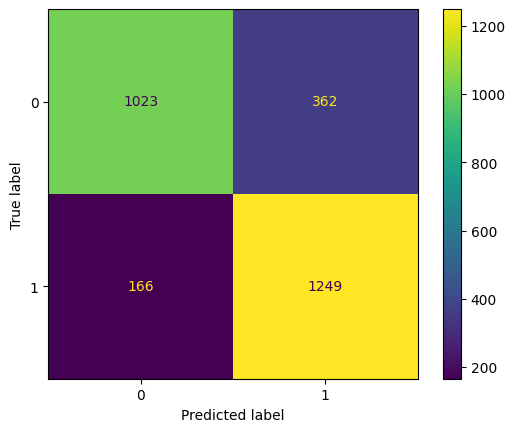

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_validation, y_validation_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [49]:
X_test = df_test['text']
X_test_transformed = vectorizer.transform(X_test)
y_test_pred = model.predict(X_test_transformed)

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test = df_test['label']

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.8128113879003559
Precision: 0.7770012706480305
Recall: 0.8748211731044349
F1-Score: 0.823014804845222


22. Create a confusion matrix using the **test dataset**

---



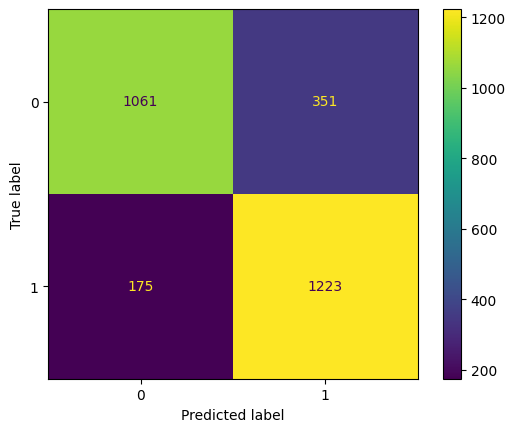

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
display(cm)

array([[1061,  351],
       [ 175, 1223]])

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [53]:
# Example non-hate speech input
input_text_non_hate = "This is a peaceful and happy day."

# Pre-process the input text
input_text_non_hate = input_text_non_hate.lower()
input_text_non_hate = re.sub(r'http\S+', '', input_text_non_hate)
input_text_non_hate = re.sub(r'[^a-zA-Z\s]', '', input_text_non_hate)
input_text_non_hate = ' '.join([word for word in input_text_non_hate.split() if word not in stop_words])
input_text_non_hate = ' '.join([stemmer.stem(word) for word in input_text_non_hate.split()])

# Transform the input text using the fitted vectorizer
input_text_non_hate_transformed = vectorizer.transform([input_text_non_hate])

# Predict the label
prediction_non_hate = model.predict(input_text_non_hate_transformed)

print(f"Input text: '{input_text_non_hate}'")
print(f"Predicted label: {prediction_non_hate[0]}")

Input text: 'peac happi day'
Predicted label: 0


24. Test the model by providing a hate speech input. The model should predict it as 1





In [54]:
# Example hate speech input
input_text_hate = "You are an idiot!"

# Pre-process the input text
input_text_hate = input_text_hate.lower()
input_text_hate = re.sub(r'http\S+', '', input_text_hate)
input_text_hate = re.sub(r'[^a-zA-Z\s]', '', input_text_hate)
input_text_hate = ' '.join([word for word in input_text_hate.split() if word not in stop_words])
input_text_hate = ' '.join([stemmer.stem(word) for word in input_text_hate.split()])

# Transform the input text using the fitted vectorizer
input_text_hate_transformed = vectorizer.transform([input_text_hate])

# Predict the label
prediction_hate = model.predict(input_text_hate_transformed)

print(f"Input text: '{input_text_hate}'")
print(f"Predicted label: {prediction_hate[0]}")

Input text: 'idiot'
Predicted label: 1
